In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

$$Correspondance Principle$$ \
$$f_{cn}=\frac{me^4}{32\pi^2\epsilon_{0}^2h^3n^3}$$\
$$f_{qn}=(\frac{me^4}{64\pi^3\epsilon_{0}^2h^3})\frac{(2n-1)}{{n}^2(n-1)^2}\$$



In [2]:
f_cn=lambda n:m*(e**4)/(32*(np.pi**3)*(Eo**2)*(h**3)*(n**3))
f_qn=lambda n:(m*e**4)*((2*n)-1)/(64*np.pi**3*Eo**2*h**3*(n**2)*(n-1)**2)
m=9.1*10**(-31)
e=1.6*10**(-19)
Eo=8.85*10**(-12)
h=1.055*10**(-34)

In [14]:
#function has 3 argument 
#1) f_cn frequency of classical electron moving in Bohr's nth orbit
#2) f_qn frequency of the electron when it make transition from n to n-1 energy level in hydrogen atom
#3) for calculation of n upto N p must be divided to achieve a tolerance

def Correspondance_P(f_cn,f_qn,N):
    k=0     #iterator
    while True: #when the condition is true then break otherwise repeat
        p=np.arange(0.01,N,0.5) 
        n=[10**i for i in p]
        f_cn1=[f_cn(j) for j in n]
        f_qn1=[f_qn(j) for j in n]
        if abs(f_cn1[-1]-f_qn1[-1])<=0.00001: #condition reqired to achieve tol
            break    
        N+=0.5 # if the condition not satisfied for given N then increment N by 0.5 and repeat
        k+=1  # count how many times the loop repeat
    delta_f=abs(np.array(f_cn1)-np.array(f_qn1)) #with the help of array subtract the frequencies for same value of n
    rel_dif=delta_f/np.array(f_qn1) # reletive difference
    rel100=rel_dif*100 # relative difference %
    ln_n=np.log10(np.array(n))# values of ln(n)
    table=pd.DataFrame({"n":n,"f_cn":f_cn1,"f_qn":f_qn1,"delta f":delta_f,"relative diff ":rel_dif,"relative diff %":rel100,"ln_n":ln_n})
    return table,n,f_qn1,f_cn1,ln_n,rel_dif,N
C=Correspondance_P(f_cn,f_qn,2.5)#initially N = 2.5
print(display(C[0]))
print(C[6])

,n,f_cn,f_qn,delta f,relative diff,relative diff %,ln_n
0,1.023293,6.099269e+15,6.019663e+18,6.013563e+18,0.998987,99.898678,0.01
1,3.235937,1.928758e+14,3.415583e+14,1.486825e+14,0.435306,43.530631,0.51
2,10.232930,6.099269e+12,7.125943e+12,1.026673e+12,0.144075,14.407545,1.01
3,32.359366,1.928758e+11,2.021996e+11,9.323817e+09,0.046112,4.611194,1.51
4,102.329299,6.099269e+09,6.189855e+09,9.058584e+07,0.014635,1.463457,2.01
5,323.593657,1.928758e+08,1.937736e+08,8.977631e+05,0.004633,0.463305,2.51
6,1023.292992,6.099269e+06,6.108222e+06,8.952313e+03,0.001466,0.146562,3.01
7,3235.936569,1.928758e+05,1.929653e+05,8.944335e+01,0.000464,0.046352,3.51
8,10232.929923,6.099269e+03,6.100163e+03,8.941815e-01,0.000147,0.014658,4.01
9,32359.365693,1.928758e+02,1.928848e+02,8.941018e-03,0.000046,0.004635,4.51


None
6.0


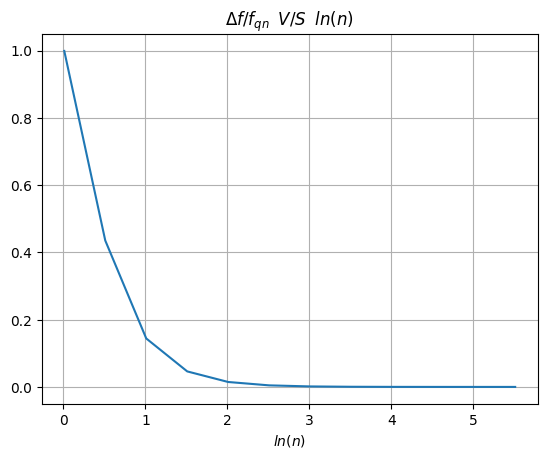

In [4]:
plt.plot(C[4],C[5])
plt.title("$\Delta f/f_{qn} \;\;V/S \;\;ln(n)$")
plt.xlabel("$\Delta f/f_{qn} $")
plt.xlabel("$ ln(n)$")
plt.grid()
plt.show()
